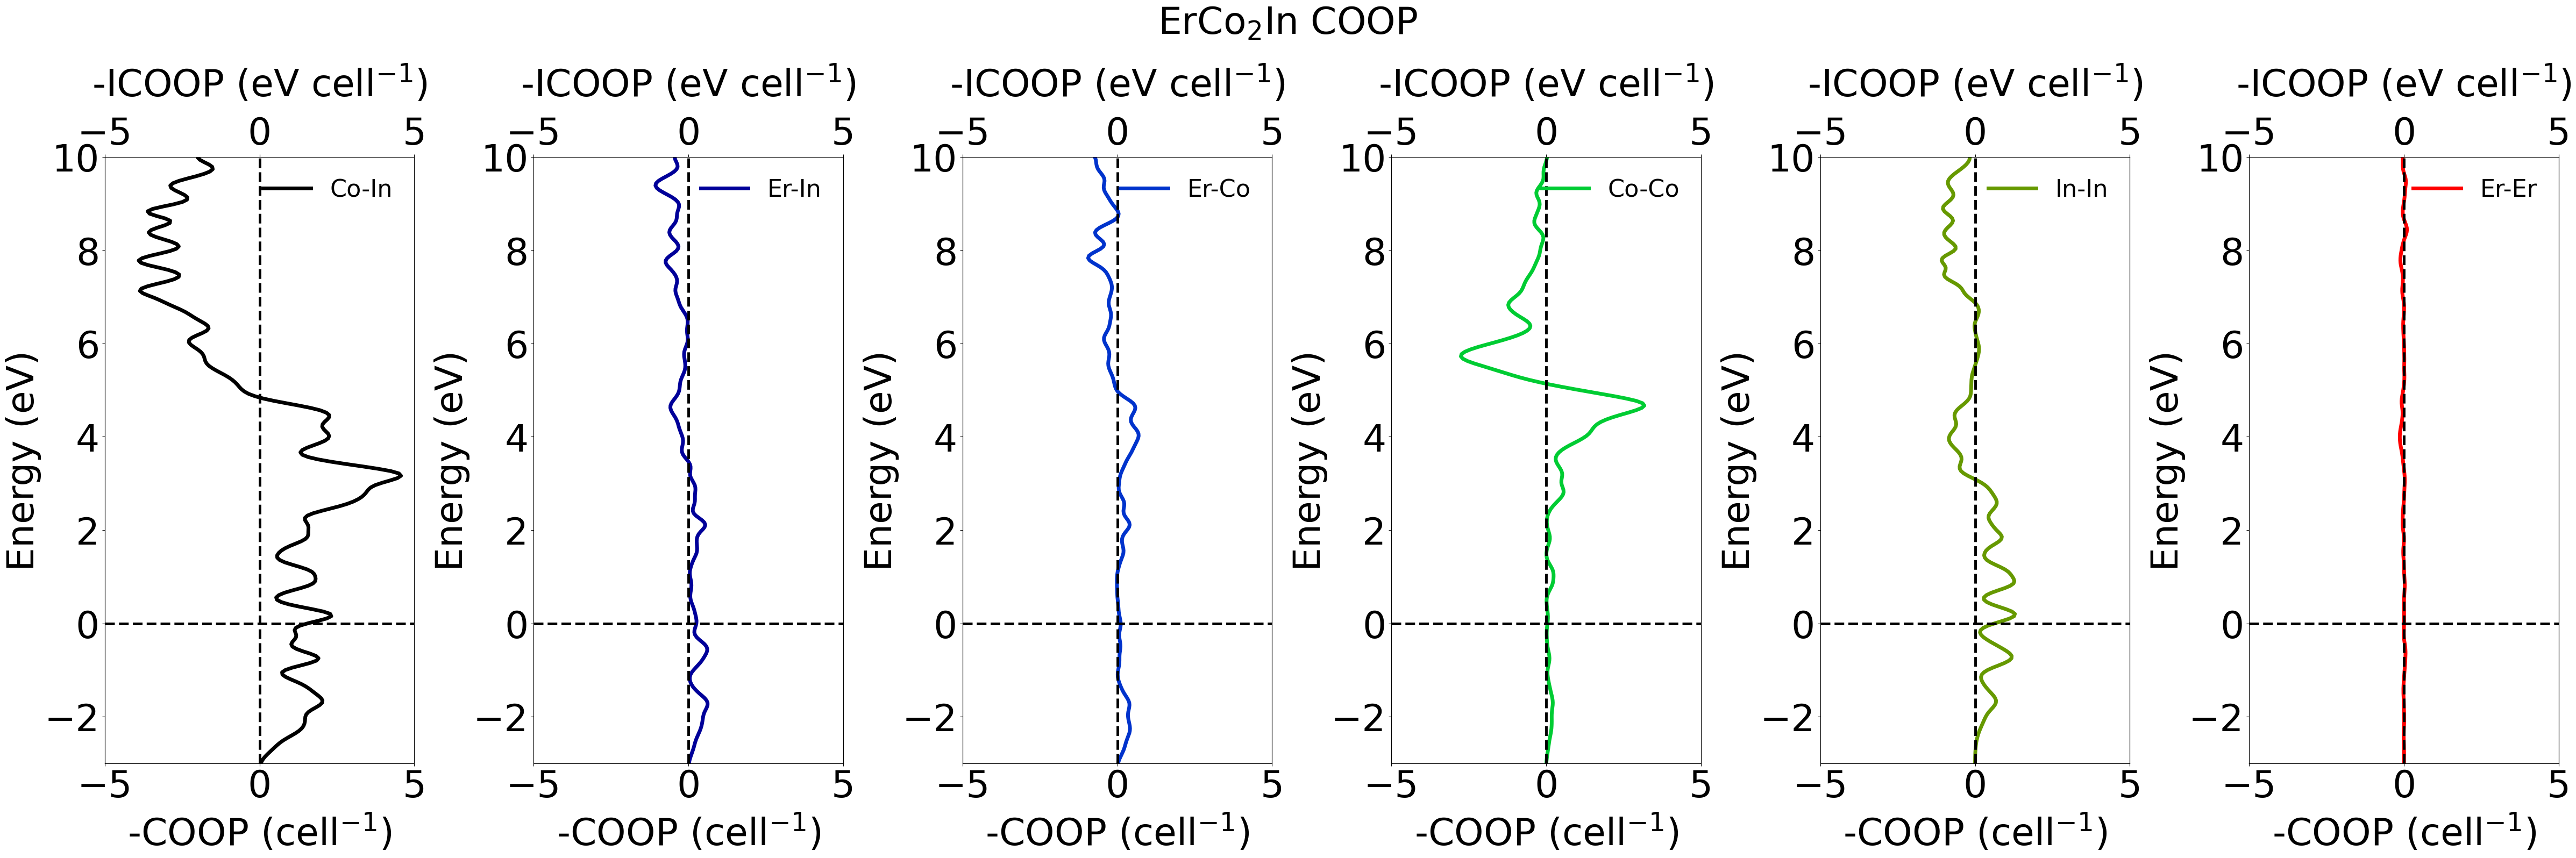

In [146]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import re  # Import regular expression module
import glob
from matplotlib.colors import LinearSegmentedColormap

def plot_coop_contributions(directory):
    coop_files = get_coop_files(directory)
    num_files = len(coop_files)
    fig, axs = plt.subplots(1, num_files, figsize=(8*num_files, 16))  # Create figure and axis with subplots side by side

    # Extract folder name
    folder_name = os.path.basename(directory)
    
    # Use regular expression to find numbers and subscript them
    folder_name_subscripted = re.sub(r'(\d+)', lambda x: r'$_\mathrm{' + x.group(0) + r'}$', folder_name)
    
    # Define a custom colormap without yellow
    colors = [(0.0, 0.0, 0.0), (0.0, 0.0, 1.0), (0.0, 1.0, 0.0), (1.0, 0.0, 0.0)]
    cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=num_files)
    
    for i, filename in enumerate(coop_files):
        # Read data from file
        data = np.loadtxt(filename)
        
        # Split x and y values
        x = data[:, 0]
        y = data[:, 1]
        
        # Get file name without extension
        file_name = os.path.splitext(os.path.basename(filename))[0]
        
        # Plot the data on a separate subplot with a different color
        axs[i].plot(x, y, label=file_name.replace('coop-', ''), linewidth=5, color=cmap(i))  # Set line width to 2
        
        # Plot a line at y=0 and x=0
        axs[i].axhline(0, color='black', linestyle='--', linewidth=3.5)
        axs[i].axvline(0, color='black', linestyle='--', linewidth=3.5)
        
        axs[i].set_xlabel('-COOP (cell$^{-1}$)', fontsize=50, labelpad=10)  # Set font size for x-axis label and adjust label position at the bottom
        axs[i].xaxis.set_label_coords(0.5, -0.08)  # Adjust the position of the x-axis label at the bottom

        axs2 = axs[i].twiny()  # Create a secondary x-axis at the top
        axs2.set_xlabel('-ICOOP (eV cell$^{-1}$)', fontsize=50, labelpad=10)  # Set font size for x-axis label and adjust label position at the top
        axs2.xaxis.set_label_coords(0.5, 1.10)  # Adjust the position of the x-axis label at the top

        # Set x-axis ticks for both axes
        axs[i].set_xticks([-5, 0, 5])
        axs2.set_xticks([-5, 0, 5])

        # Set font size for ticks
        axs[i].tick_params(axis='x', labelsize=50)
        axs[i].tick_params(axis='y', labelsize=50)
        axs2.tick_params(axis='x', labelsize=50)

        axs[i].set_ylabel('Energy (eV)', fontsize=50)  # Set font size for y-axis label
        axs[i].set_title("", fontsize=50, pad=5)  # Set an empty title to remove file name
        axs[i].set_ylim(-3, 10)  # Set the y-axis limits for subsequent plots
        axs[i].set_xlim(-5, 5)  # Set the adjusted x-axis limits
        axs[i].xaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis
        axs[i].yaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis

        # Remove x-axis tick marks and labels from the top axis
        axs[i].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
        axs2.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True)

        # Add legend to each subplot
        axs[i].legend(frameon=False, fontsize=32, loc='upper right')
        
        # Set x-axis ticks for bottom axis
        axs[i].set_xticks([-5, 0, 5], minor=False)

    # Add common title on the top
    plt.suptitle(folder_name_subscripted + ' COOP', fontsize=50, y=1)

    plt.tight_layout()
    plt.show()

    # Save the plot as PNG based on folder name with a custom filename
    output_filename = os.path.join(os.path.expanduser('~'), 'Desktop/Structures/Graphs/COOP', folder_name + ".png")
    fig.savefig(output_filename, bbox_inches='tight')


def get_coop_files(directory):
    # Use glob to find all files starting with "coop-" in the specified directory
    coop_files = glob.glob(os.path.join(directory, 'coop-*'))
    # Sort files based on custom order
    coop_files.sort(key=lambda x: custom_order(os.path.basename(x)))
    return coop_files

if __name__ == "__main__":
    desktop_directory = os.path.expanduser("~/Desktop")
    structures_directory = os.path.join(desktop_directory, "Structures/ErCo2In")

    plot_coop_contributions(structures_directory)